In [5]:
# Import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer



In [6]:
# Load CSV data into a pandas DataFrame
df = pd.read_csv('data/Battery_RUL_cleaned.csv')
#df = pd.read_csv('data/Battery_RUL.csv')
df = df[df.columns[1:]]  # Remove the first column

# Last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

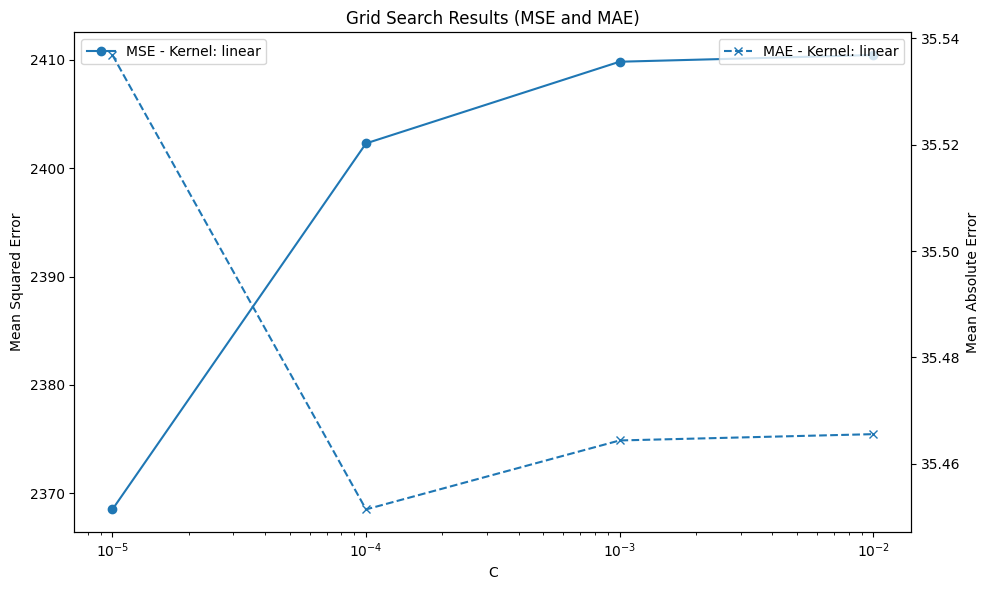

Mean Absolute Error: 35.6114
Mean Squared Error: 2376.1314


In [4]:
# Define the hyperparameter grid
param_grid = [
  {'C': [1e-5, 1e-4, 1e-3, 1e-2], 'kernel': ['linear']} ]
# Define the scoring dictionary
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}
# Initialize and train the SVM model
# model = SVR(kernel='linear', C=0.1, epsilon=0.2)
# Mean Absolute Error: 35.6885
# Mean Squared Error: 2358.7762
model = GridSearchCV(SVR(), param_grid, cv=5, scoring=scoring, refit='MSE', n_jobs=-1)
model.fit(X_train, y_train)

# Extract the results and convert to a DataFrame
results = pd.DataFrame(model.cv_results_)

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE on the primary y-axis
for kernel in results['param_kernel'].unique():
    subset = results[results['param_kernel'] == kernel]
    ax1.plot(subset['param_C'], -subset['mean_test_MSE'], label=f'MSE - Kernel: {kernel}', linestyle='-', marker='o')
ax1.set_xlabel('C')
ax1.set_ylabel('Mean Squared Error')
ax1.set_xscale('log')
ax1.legend(loc='upper left')
ax1.set_title('Grid Search Results (MSE and MAE)')

# Create a secondary y-axis for MAE
ax2 = ax1.twinx()
for kernel in results['param_kernel'].unique():
    subset = results[results['param_kernel'] == kernel]
    ax2.plot(subset['param_C'], -subset['mean_test_MAE'], label=f'MAE - Kernel: {kernel}', linestyle='--', marker='x')
ax2.set_ylabel('Mean Absolute Error')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Get the best model
best_model = model.best_estimator_

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
# first run: 39.9814

In [8]:
# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
# first run: 8.0703
# best run: 7.9780

Mean Absolute Error: 7.9780
Mean Squared Error: 236.9407


In [6]:
# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.1)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
# first run: 15.3975
# best run: 7.9632

Mean Absolute Error: 7.9632
Mean Squared Error: 210.3707


In [8]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# first run: 39.9814

Mean Absolute Error: 48.1311
Mean Squared Error: 3505.6304


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
